# Sparseness  and hidden layer activity
Here we are trying to get sparseness right. 

The first thing is to get sparseness working for normal recalling, if that is succesfully we will test whether it it possible to get a bigger area of succesfull recall with this property and maybe the area of correct sequence disambiguation rights to the left of it. 

**Work plan**
* Try the normal case
* Try sparseness only in C3
* Try sparseness only in the hidden layer

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

In [2]:
from network import MinaNetwork

## Sparseness for simple sequence completition
First let's be sure that the normal appraoch does not work actually.

In [34]:
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 35.0   # Input - C3 connection
b = 35.0   # Input - C1 connection
Kr = 0.4  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.7  # Inhibition from C3 to C1
p = 0.9   # Sparness parameter
p2 = 0.9

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 5.0

# Training parameters
sequence = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 200
verbose = False


nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, p2=p2, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence, verbose=verbose, save_quantities=True)

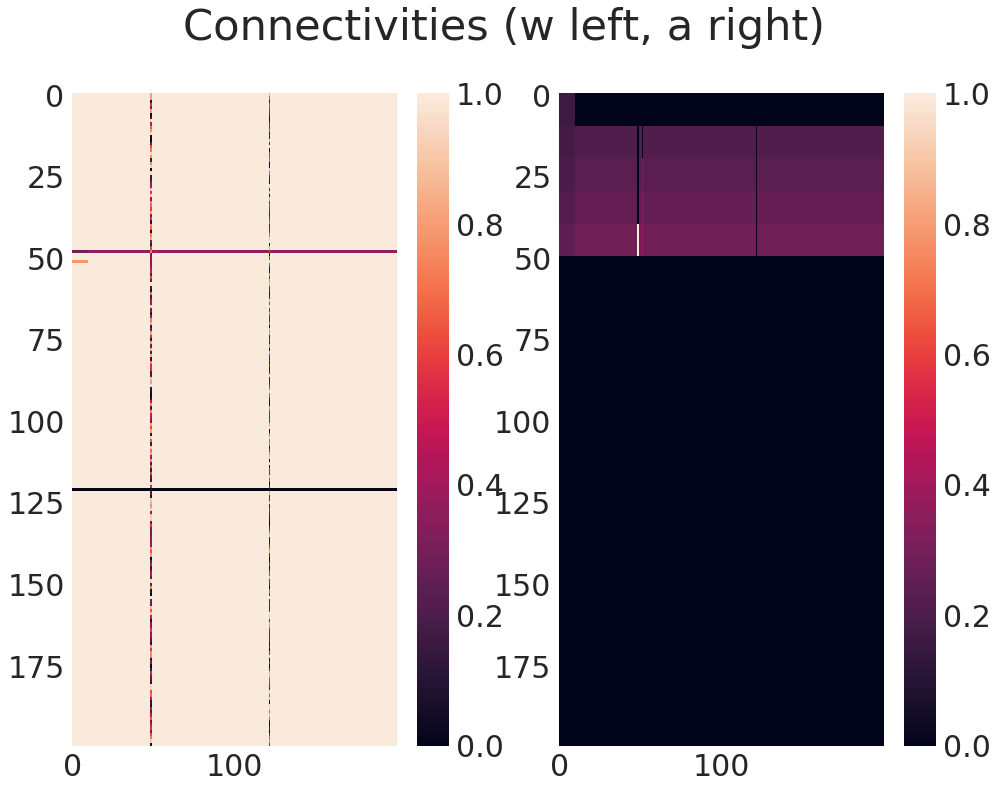

In [35]:
nn.plot_weight_matrices()

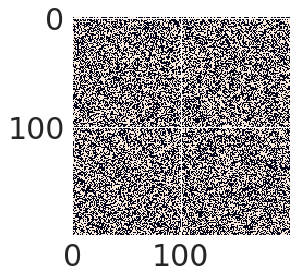

In [21]:
plt.imshow(nn.c1)

In [31]:
aux = (np.dot(nn.GC3  * nn.c1 *nn.w, nn.patterns_dictionary[0]))
np.where(aux > 0.1)
# np.sum(np.where(aux > 0.1))

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  41,  42,  50,
         67,  84,  86,  91,  93,  99, 111, 114, 170, 178]),)

In [27]:
(nn.c1 * nn.w).shape

(200, 200)

In [14]:
nn.recall(cue=0, recall_time=2, verbose=True)

------
0
----
s
10.0
m
0
C3 layer
recurrent excitation
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
---- inhibition
0.0
excitation input
[ 35.  35.  35.  35.  35.  35.  35.  35.  35.  35.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [11]:
print(success)

20.0


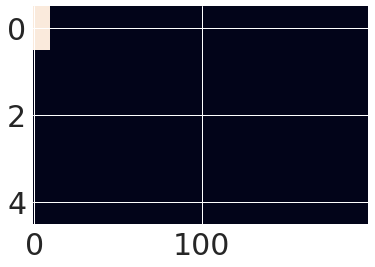

In [13]:
plt.imshow(z, aspect='auto')